In [35]:
from bs4 import BeautifulSoup
import requests

url="https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"

page=requests.get(url)

soup=BeautifulSoup(page.text, 'html.parser')

table= soup.find('table', class_='wikitable')

all_titles=table.find_all('th')
print(all_titles)

[<th>Rank
</th>, <th>Name
</th>, <th>Industry
</th>, <th>Revenue <br/>(USD millions)
</th>, <th>Revenue growth
</th>, <th>Employees
</th>, <th>Headquarters
</th>]


In [14]:
titles= [title.text.strip() for title in all_titles]
print(titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [15]:
import pandas as pd

In [16]:
df= pd.DataFrame(columns=titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [54]:
column_data= table.find_all('tr')[1:]

rows_data=[]
for row in column_data:
    rows=row.find_all('td')
    row_data=[row.text.strip() for row in rows]
    rows_data.append(row_data)
print(rows_data)



[['1', 'Walmart', 'Retail', '611,289', '6.7%', '2,100,000', 'Bentonville, Arkansas'], ['2', 'Amazon', 'Retail and cloud computing', '513,983', '9.4%', '1,540,000', 'Seattle, Washington'], ['3', 'ExxonMobil', 'Petroleum industry', '413,680', '44.8%', '62,000', 'Spring, Texas'], ['4', 'Apple', 'Electronics industry', '394,328', '7.8%', '164,000', 'Cupertino, California'], ['5', 'UnitedHealth Group', 'Healthcare', '324,162', '12.7%', '400,000', 'Minnetonka, Minnesota'], ['6', 'CVS Health', 'Healthcare', '322,467', '10.4%', '259,500', 'Woonsocket, Rhode Island'], ['7', 'Berkshire Hathaway', 'Conglomerate', '302,089', '9.4%', '383,000', 'Omaha, Nebraska'], ['8', 'Alphabet', 'Technology and cloud computing', '282,836', '9.8%', '156,000', 'Mountain View, California'], ['9', 'McKesson Corporation', 'Health', '276,711', '4.8%', '48,500', 'Irving, Texas'], ['10', 'Chevron Corporation', 'Petroleum industry', '246,252', '51.6%', '43,846', 'San Ramon, California'], ['11', 'Cencora', 'Pharmacy whole

In [55]:
df=pd.DataFrame(rows_data, columns=titles)
df.to_csv("Top Companies in US", index=False)

In [75]:
df= pd.read_csv("Top Companies in Us.csv")
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.70%,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.40%,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.80%,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.80%,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.70%,400000,"Minnetonka, Minnesota"


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

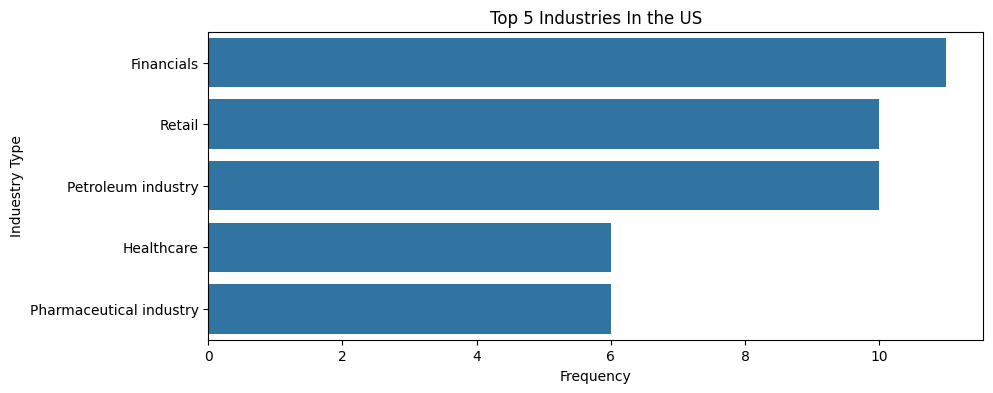

In [77]:
plt.figure(figsize=(10,4))
sns.countplot(y='Industry',data=df,order=df['Industry'].value_counts().index[:5])
plt.title("Top 5 Industries In the US")
plt.xlabel("Frequency")
plt.ylabel('Induestry Type')
plt.show()

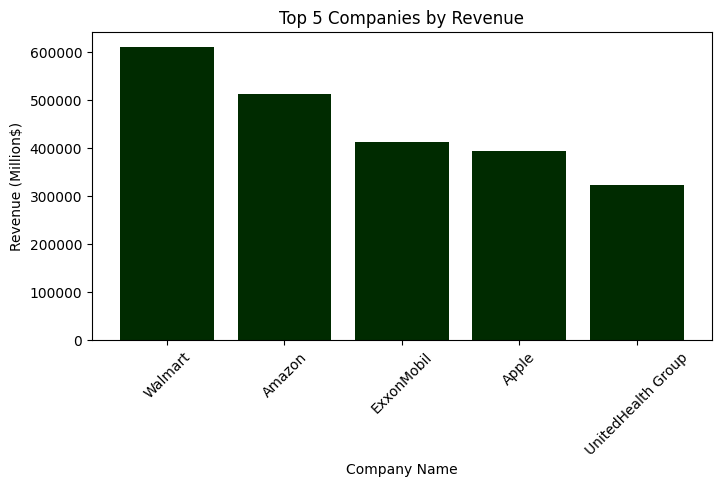

In [107]:
plt.figure(figsize=(8, 4))

top_10= df.sort_values(by='Revenue (USD millions)',ascending=False).head(5)
plt.bar(top_10['Name'], top_10['Revenue (USD millions)'], color='#002B00')

# Adding titles and labels
plt.title('Top 5 Companies by Revenue')
plt.xlabel('Company Name')
plt.ylabel('Revenue (Million$)')
plt.xticks(rotation=45) 


# Display the plot
plt.show()